Name - Umair


# I. Module imports, data input and cleaning

In module imports we will import the required libraries for data input, data cleaning, and data processing

Here we use numpy, pandas, matplotlib for taking the data, manipulating the data and plotting the data

the datetime library is imported to use date as a dimension that would help us to derive another dimension with respect to the input dataset

Adding to matplotlib we use seaborn library to plot some histograms

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import matplotlib.cm as cm

%matplotlib inline

In [143]:
%pwd

'C:\\Users\\umair\\OneDrive - Northeastern University\\COURSES\\NEU\\INFO 7370'

Importing data in excel format and then converting it to pandas dataframe!

In [145]:
df = pd.read_excel("Online Retail-1.xlsx")
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


info() method will give the intuition of data

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Checking for percentage of NULLS in each column and visualizing it for simplicity

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

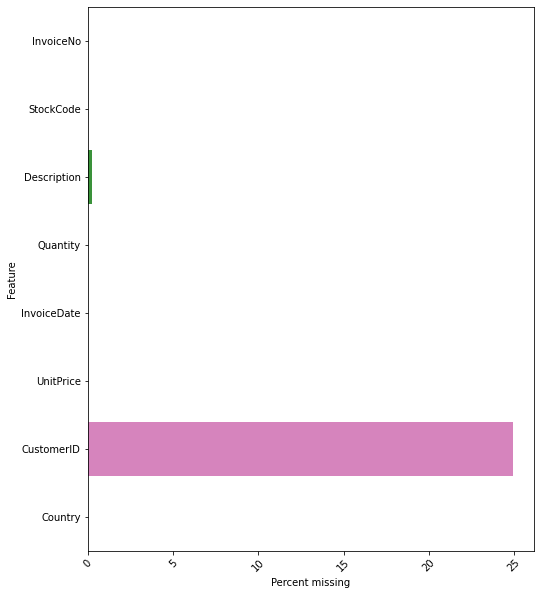

In [156]:
'''Calculate percentage null values for each column or feature'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

highlighting total number of NULLS in our dataset

In [157]:
df.isnull().sum().sum()

136534

In [158]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Drop rows with any null values

In [159]:
df1 = df.dropna(subset = ["CustomerID","Description"])
df1.shape

(406829, 8)

In [160]:
'''Drop duplicated rows'''
df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Selecting the columns we need

In [162]:
df3 = df2 [['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
print(df3.shape)
df3.head(2)

(401604, 5)


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39


Creating a total price column by multiplying quantity with unit price

In [165]:
df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']
print(df3.shape)
df3.head(2)

(401604, 6)


<ipython-input-165-01d10714b808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [166]:
'''Print out earliest and latest dates in the data'''

print('Min:{}; Max:{}'.format(df3["InvoiceDate"].min(), df3["InvoiceDate"].max()))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [167]:
'''Create a reference point for the analysis'''

current_date = dt.datetime(2011,12,10)
current_date

datetime.datetime(2011, 12, 10, 0, 0)

In [168]:
'''Calculate the aggregates" recency, frequency and, monetary. Recency tells you how many days since
last transaction for each customer, frequency tells you how frequently does a customer shop and,
monetary tells you the total shopping spending for each customer'''

df4 = df3.groupby(['CustomerID']).agg({ 'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})
df4.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
print(df4.shape)
df4.head(3)

(4372, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24


In [169]:
'''Remove rows with any zero values. This is to facilitate downstream pre-processing and avoid NaNs'''

df5 = df4[(df4 > 0).all(1)]
print(df5.shape)

(4284, 3)


# II. Data Pre-processing

Performing ***EDA*** for visualizing, summarizing and interpreting the dataset

In [170]:
'''The K-means clustering algorithm has a few key assumptions about the data: (1) data is not skewed, 
(2) features have the same mean and, (3) features have the same variance'''

df5.describe()

,Recency,Frequency,Monetary
count,4284.000000,4284.000000,4.284000e+03
mean,90.673436,90.187675,1.802891e+03
std,99.212825,217.749044,7.226246e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,2.988725e+02
50%,50.000000,42.000000,6.467200e+02
75%,140.000000,99.000000,1.596963e+03
max,373.000000,7812.000000,2.794890e+05


Looks like the means and standard deviations are so different. So, we need to transform the data to meet
the requirements

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

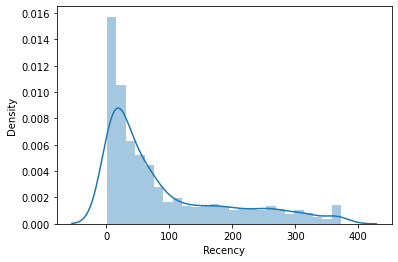

In [171]:
'''Are the data dimensions skewed?'''

sns.distplot(df5['Recency'])

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

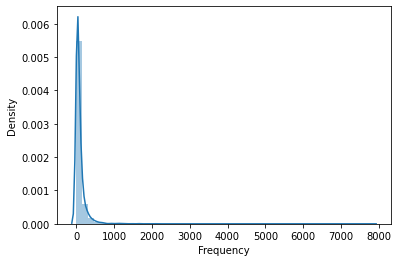

In [172]:
sns.distplot(df5['Frequency'])

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

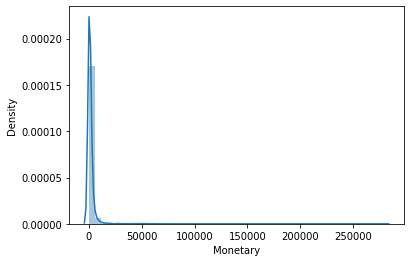

In [175]:
sns.distplot(df5['Monetary'])

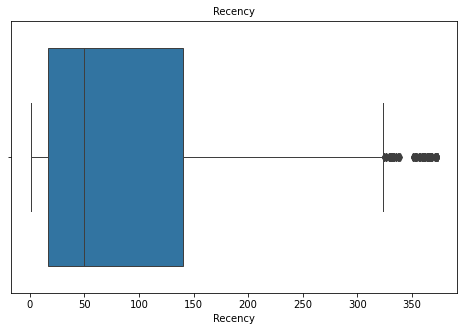

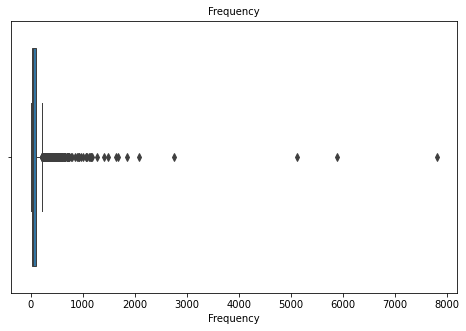

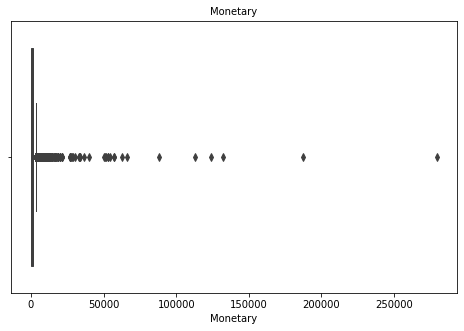

In [180]:
'''box plots to check for outliers'''
for index,column in enumerate(df5.columns):
    plt.figure(index, figsize=(8,5))
    sns.boxplot(x=column, data=df5,linewidth=1)
    plt.title('{}'.format(column), fontsize = 10)

In [181]:
'''Looks like the data is skewed. Maybe monetary is not, but the other two definitely are skewed. We log
transform the data to remove the skew. Add a constant to offset any negative values. '''

df6 = (np.log(df5 + 1))
print(df6.shape)
df6.head(3)


(4284, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245


C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

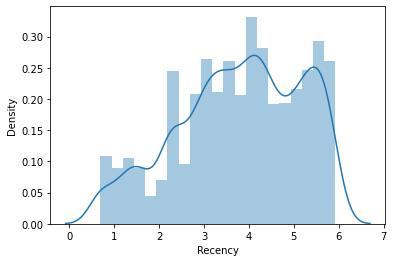

In [182]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Recency'])

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

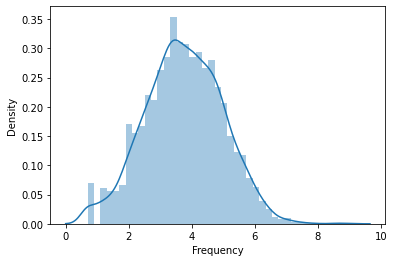

In [183]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Frequency'])

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

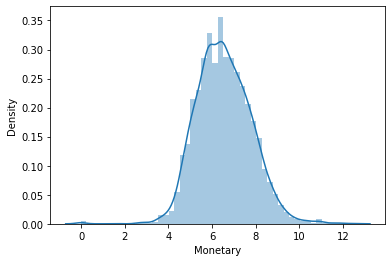

In [184]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Monetary'])

It has made the data look more normal !

In [185]:
df6.describe()

,Recency,Frequency,Monetary
count,4284.000000,4284.000000,4.284000e+03
mean,3.784904,3.747599,6.544498e+00
std,1.370001,1.230195,1.247978e+00
min,0.693147,0.693147,1.776357e-15
25%,2.890372,2.944439,5.703357e+00
50%,3.931826,3.761200,6.473459e+00
75%,4.948760,4.605170,7.376484e+00
max,5.924256,8.963544,1.254072e+01


In [186]:
df6.skew()

Recency     -0.376932
Frequency   -0.011670
Monetary     0.195432
dtype: float64

Function to polt the graph

In [188]:
def plot_fig(X):
    plt.figure(figsize=(15,6))
    for index, column in enumerate(df6.columns):
        sns.kdeplot(X[column])
        

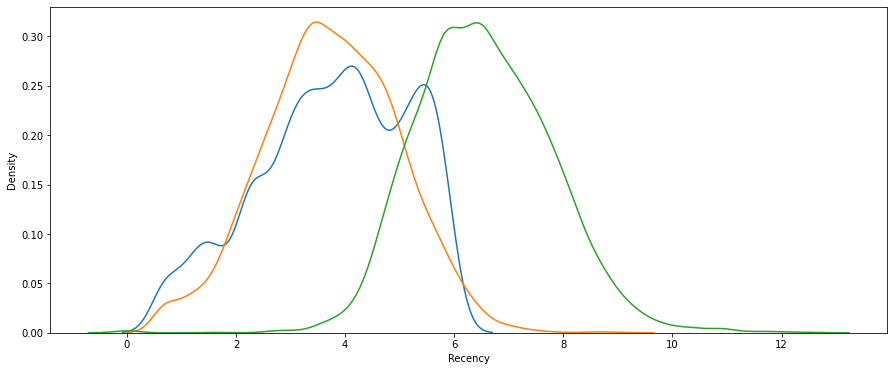

In [189]:
'''Checking the data before scaling the dataframe'''
plot_fig(df6)

We need to scale our data, here we are using standard scaler to scale our data. Each value is substracted by it's mean value and then divided by its standard deviation.

Doing this, we are transforming its mean to 0 and standard deviation to 1

The idea is to normalize out variables before processing it into machine learning model

In [191]:
def scaling(df):
    df_scaled = df.copy()
    for i in df.columns:
         df_scaled[i] = (df[i] - df[i].mean(axis=0)) / (df[i].std(axis=0))
    return df_scaled

In [192]:
df6

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
12352.0,3.610918,4.564348,7.343691
...,...,...,...
18280.0,5.627621,2.397895,5.201806
18281.0,5.198497,2.079442,4.404522
18282.0,2.079442,2.639057,5.179534


In [193]:
df7 = pd.DataFrame(scaling(df6))
df7.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,-1.960795,1.188338,1.461907
12348.0,0.398415,-0.229121,0.761284
12349.0,-0.613478,0.452340,0.743400
12350.0,1.426925,-0.696822,-0.584284
12352.0,-0.126997,0.663919,0.640391


In [194]:
df6_scaled = df6.copy()
for i in df6.columns:
     df6_scaled[i] = (df6[i] - df6[i].mean(axis=0)) / (df6[i].std(axis=0))

Checking the data after scaling the dataframe

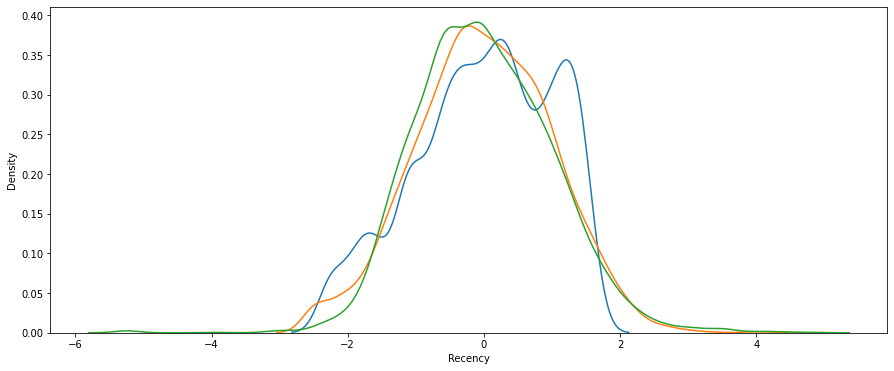

In [195]:
plot_fig(df6_scaled)

Correlation Matrix : It is used in variables to demonstrate a linear relationship between each other. 

Checking if any columns have high corelation

In [199]:
df6_scaled.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.488547,-0.473946
Frequency,-0.488547,1.000000,0.767389
Monetary,-0.473946,0.767389,1.000000


<AxesSubplot:>

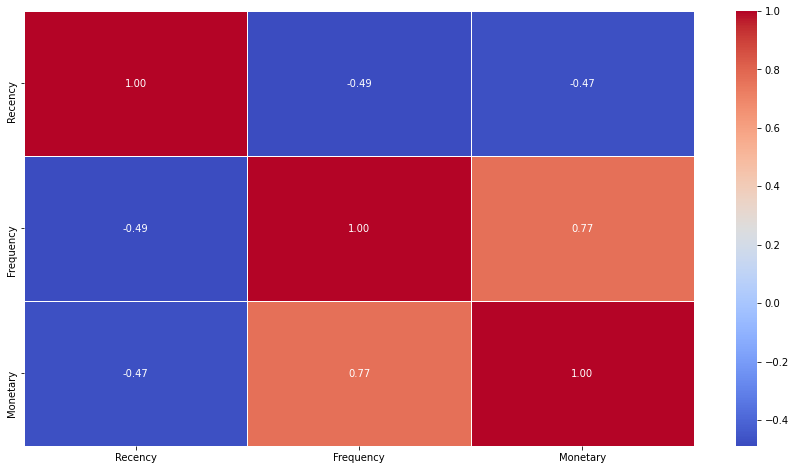

In [200]:
plt.figure(figsize=(15,8))
sns.heatmap(df6_scaled.corr(), annot=True, linewidths=1, linecolor='white', fmt=".2f",cmap="coolwarm")

In [201]:
df6_scaled.describe()

,Recency,Frequency,Monetary
count,4.284000e+03,4.284000e+03,4.284000e+03
mean,-6.526091e-16,-2.439869e-14,-1.510466e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.256755e+00,-2.482901e+00,-5.244081e+00
25%,-6.529427e-01,-6.528720e-01,-6.740030e-01
50%,1.072420e-01,1.105624e-02,-5.692351e-02
75%,8.495291e-01,6.971021e-01,6.666674e-01
max,1.561569e+00,4.239934e+00,4.804752e+00


In [202]:
df6_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,-1.960795,1.188338,1.461907
12348.0,0.398415,-0.229121,0.761284
12349.0,-0.613478,0.452340,0.743400
12350.0,1.426925,-0.696822,-0.584284
12352.0,-0.126997,0.663919,0.640391


# III. K-means clustering

K-Means Algorithm : K-means clustering is a popular unsupervised machine learning algorithm.
 It’s helpful to bucket the data by sorting similar observations together into a  cluster.
 We can compare and contrast the buckets to understand the features that drive cross-bucket differentiation.

In [204]:
def recalculate_clusters(plot ,X, centroids, k):
    """ Recalculates the clusters """
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    # Setting the plot points using dataframe (X) and the vector norm (magnitude/length)
    clus_value = []
    for data in X:
        # Set up list of euclidian distance and iterate through
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
        clus_value.append(euc_dist.index(min(euc_dist)))
    
    if plot == True:
        df6_scaled['cluster'] = clus_value
    
    return clusters    
 
def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """ 
    for i in range(k):
        # Finds the average of the cluster at given index
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

def plot_clusters(centroids, clusters, k):
    """ Plots the clusters with centroid and specified graph attributes """ 
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple','pink']
    plt.figure(figsize = (15, 10))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[2], cluster[1], c=colors[i % k], alpha=0.6, s = 200)   
    for i in range(k):
        plt.scatter(centroids[i][2], centroids[i][1], c='black', s=100)
        plt.text(centroids[i][2],centroids[i][1],'_%s Centroid'%colors[i % k], fontsize= "large")
    plt.title("K means clustering for k = %d" %k, fontsize = 16)
    plt.xlabel("Monetory", fontsize = 12)
    plt.ylabel("Frequency", fontsize = 12)
    
        
def k_means_clustering(plot, X, k, centroids={}):
    """ Calculates full k_means_clustering algorithm """
    for i in range(k):
        # Sets up the centroids based on the data
        centroids[i] = X[i]
        
    condition = True
    while condition:        
        clusters = recalculate_clusters(plot, X, centroids, k)
        prev_centroid = centroids.copy()
        centroids = recalculate_centroids(centroids, clusters, k)
        count=0
        #code to break the loop when the centroid value does not change
        for x in centroids:            
            if np.array_equal(centroids[x],prev_centroid[x]):
                count=count+1
        error=0
        
        if count==k:
            #This function is for kmeans with constant value of k
            if (plot == True):
                plot_clusters(centroids, clusters, k)
           #This function is for calculating error with different values of k     
            elif (plot == False):
                for r in centroids:
                    for j in clusters[r]:
                        error= error + (np.linalg.norm(j - centroids[r]))

            condition = False
            break
        else:
            continue
    return error


def elbow(X):
    ''' Calculate the sum of squared errors for different values of k '''
    elbow = {}
    for k in range(1,10):
        elbow[k] = k_means_clustering(False, X, k, centroids={})
    return elbow

Converting the dataset to arrays 

In [208]:
df_array = np.array(df6_scaled[df6_scaled.columns])

In [209]:
df_array

array([[-1.96079523,  1.18833802,  1.46190674],
       [ 0.39841523, -0.22912051,  0.7612842 ],
       [-0.61347761,  0.45233996,  0.74340023],
       ...,
       [-1.24486207, -0.90111042, -1.09374045],
       [-1.75080849,  2.30404658,  0.86492166],
       [-0.0173021 ,  0.41869877,  0.7789303 ]])

# K Means clustering for K = 2

0

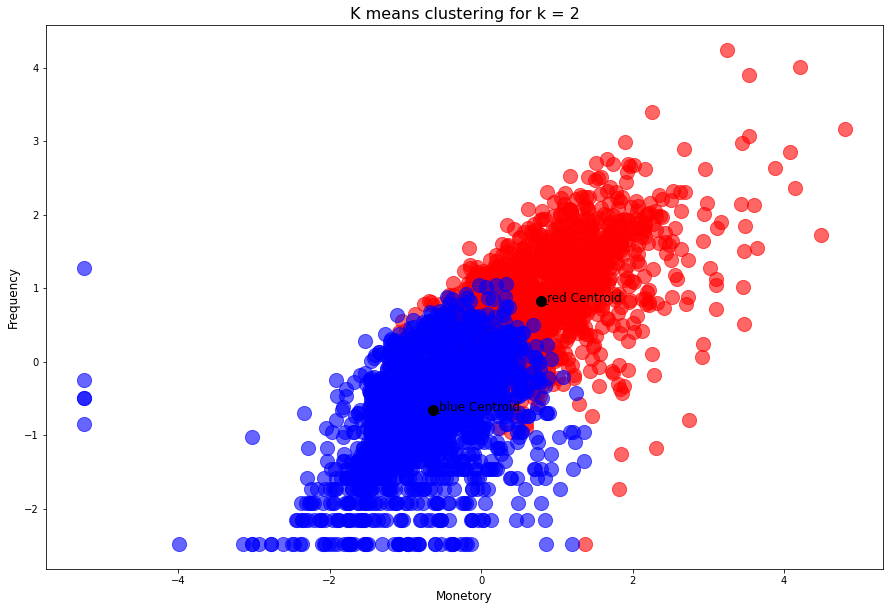

In [210]:
k_means_clustering(True,df_array,2, centroids={})

# K - Means clustering for k = 3, k = 4

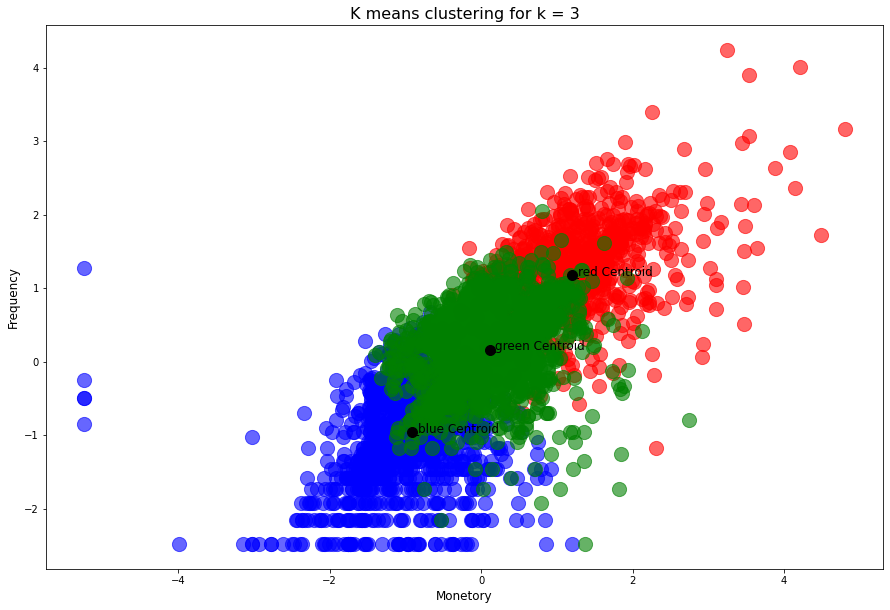

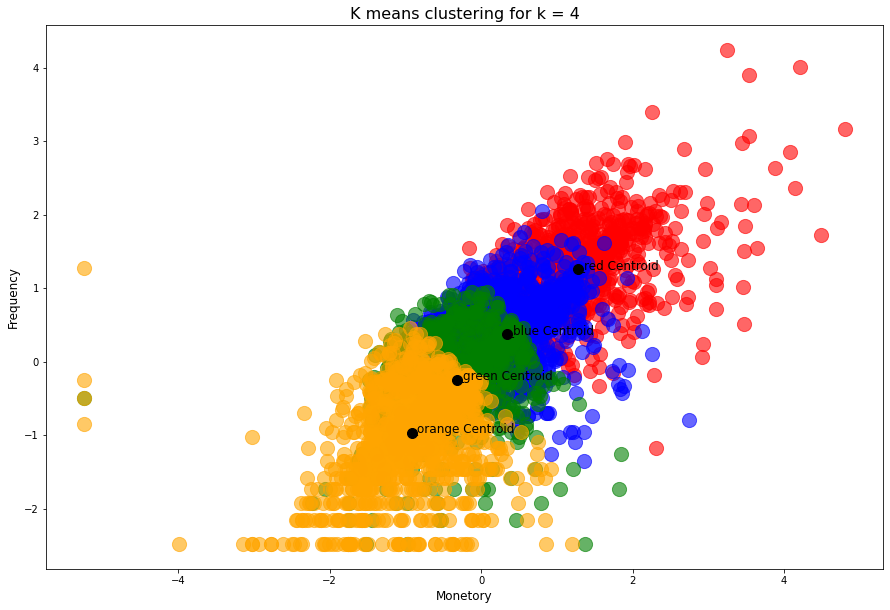

In [213]:
#fig, ax = 
for k in range(3, 5):
    k_means_clustering(True, df_array, k, centroids={})

In [111]:
df6.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [112]:
clus_labels = df6.columns

We need to get the optimal value of K. To get the optimal value of K lets use Elbow method

Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the average distance falls suddenly.

The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

<AxesSubplot:title={'center':'Elbow plot'}, xlabel='Value of k', ylabel='Sum of squared error'>

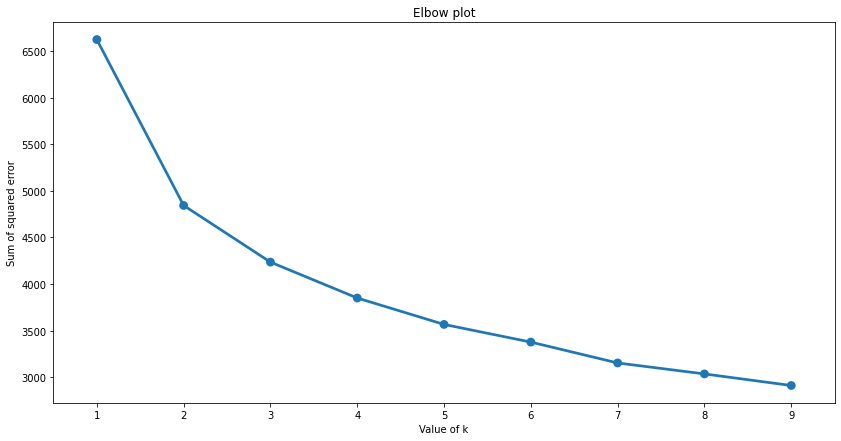

In [217]:
elbow = elbow(df_array)
x = list(elbow.keys())          
y = list(elbow.values())

plt.figure(figsize = (14,7))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=x, y=y)

from the above plot we can conclude that k = 2 would be optimized parameter. Let's do little more analysis on this dataset 

0

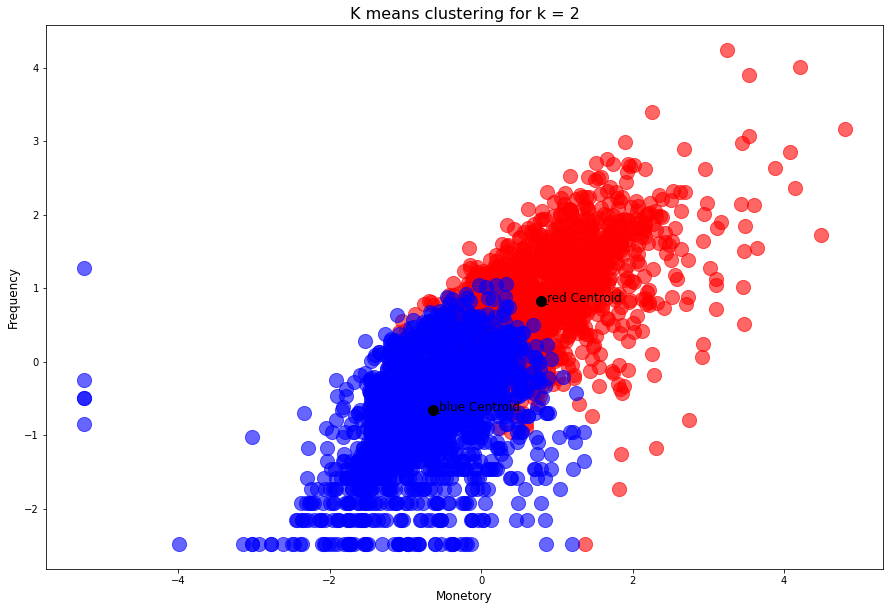

In [115]:
k_means_clustering(True,df_array,3, centroids={})

Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (cluster), while all other columns, considered measured variables (Frequency), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

Using melt to transform the dataframe and not the data itself

In [120]:
df6_melt = pd.melt(df6_scaled.reset_index(), id_vars=['cluster'],
value_vars=['Recency', 'Frequency', 'Monetary'], var_name='Attribute',
value_name='Value')

In [122]:
df6_melt.head()

,cluster,Attribute,Value
0,0,Recency,-1.960795
1,1,Recency,0.398415
2,0,Recency,-0.613478
3,1,Recency,1.426925
4,0,Recency,-0.126997


Visualize segment characteristics to understand the clusters better

<AxesSubplot:title={'center':'Segment plot'}, xlabel='Attribute', ylabel='Value'>

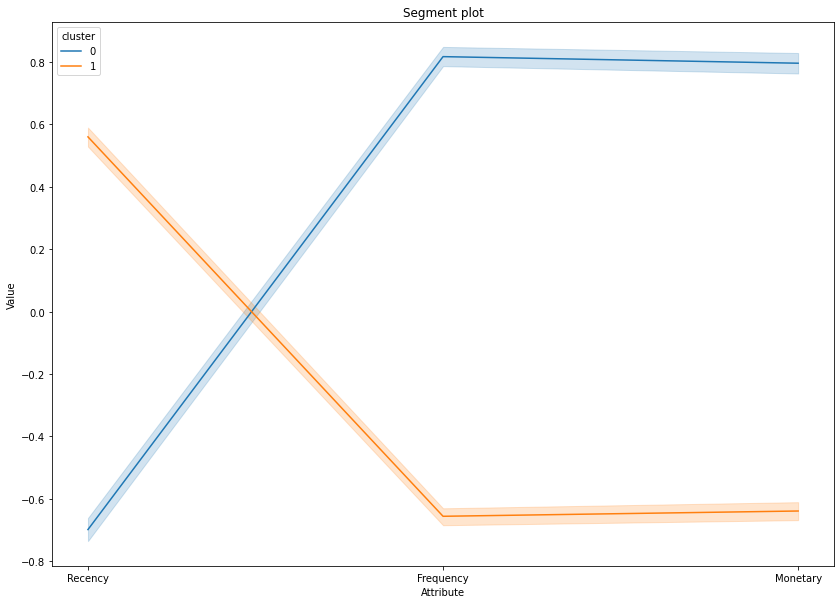

In [123]:
plt.figure(figsize = (14,10))
plt.title('Segment plot') 
sns.lineplot(x="Attribute", y="Value", hue='cluster', data=df6_melt)

# IV. Relative feature importances w.r.t clusters

In [135]:
df6.head(3)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12347.0,1.098612,5.209486,8.368925,0
12348.0,4.330733,3.465736,7.494564,1
12349.0,2.944439,4.304065,7.472245,0


In [133]:
df6_scaled.head(3)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12347.0,-1.960795,1.188338,1.461907,0
12348.0,0.398415,-0.229121,0.761284,1
12349.0,-0.613478,0.452340,0.743400,0


In [134]:
df6["cluster"] = df6_scaled["cluster"]

In [136]:
cluster_avg = df6.groupby(['cluster']).mean()
cluster_avg

,Recency,Frequency,Monetary
cluster,,,
0,2.828120,4.753241,7.538362
1,4.552505,2.940801,5.747149


In [137]:
population_avg = df6.mean()
population_avg

Recency      3.784904
Frequency    3.747599
Monetary     6.544498
cluster      0.554855
dtype: float64

In [138]:
relative_imp = cluster_avg / population_avg - 1

In [139]:
relative_imp.round(2)

,Frequency,Monetary,Recency,cluster
cluster,,,,
0,0.27,0.15,-0.25,NaN
1,-0.22,-0.12,0.20,NaN


<AxesSubplot:title={'center':'Relative importance of attributes'}, ylabel='cluster'>

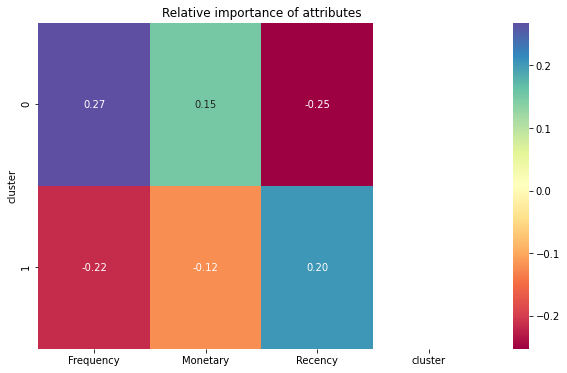

In [140]:
plt.figure(figsize=(10, 6))
plt.title('Relative importance of attributes') 
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Spectral')